
# Decision Trees

In [41]:
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier 
from sklearn.model_selection import train_test_split # Import train_test_split function 
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

import matplotlib.pyplot as plt
## Importing required libraries
import numpy as np
%matplotlib inline
#%matplotlib notebook
import seaborn as sns
import pandas as pd
df = pd.read_csv('sonar.csv', header=None)
x_unscaled = df.sample(frac=1, replace=True, random_state=1)
y = x_unscaled[60]
x_unscaled.drop([60],axis=1, inplace=True)

## Scale sonar dataset

x shape:  (208, 60)


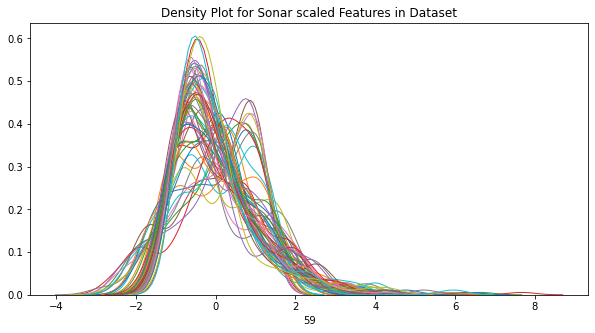

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_unscaled)
x = pd.DataFrame(scaler.transform(x_unscaled), index=x_unscaled.index, columns=x_unscaled.columns)
print("x shape: ",x.shape)
plt.figure(figsize=(10,5))
plt.title('Density Plot for Sonar scaled Features in Dataset')
for i in x.columns:
    # Draw the density plot
    sns.distplot(x[i], hist = False, kde = True,
                 kde_kws = {'linewidth': 1})
    

In [43]:
x[[10,50]].describe()

,10,50
count,2.080000e+02,2.080000e+02
mean,-2.989062e-17,1.024821e-16
std,1.002413e+00,1.002413e+00
min,-1.457818e+00,-1.185540e+00
25%,-8.132420e-01,-6.996136e-01
50%,-1.971152e-02,-2.022988e-01
75%,4.391181e-01,3.405716e-01
max,3.580913e+00,6.323535e+00


In [44]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) 

## Single Decision Tree

In [45]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [46]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8888888888888888


## Visualize the decision tree
Looks like Variable #50 is very important as wel as other usual suspects known from previous ecpetience with this dataset. 

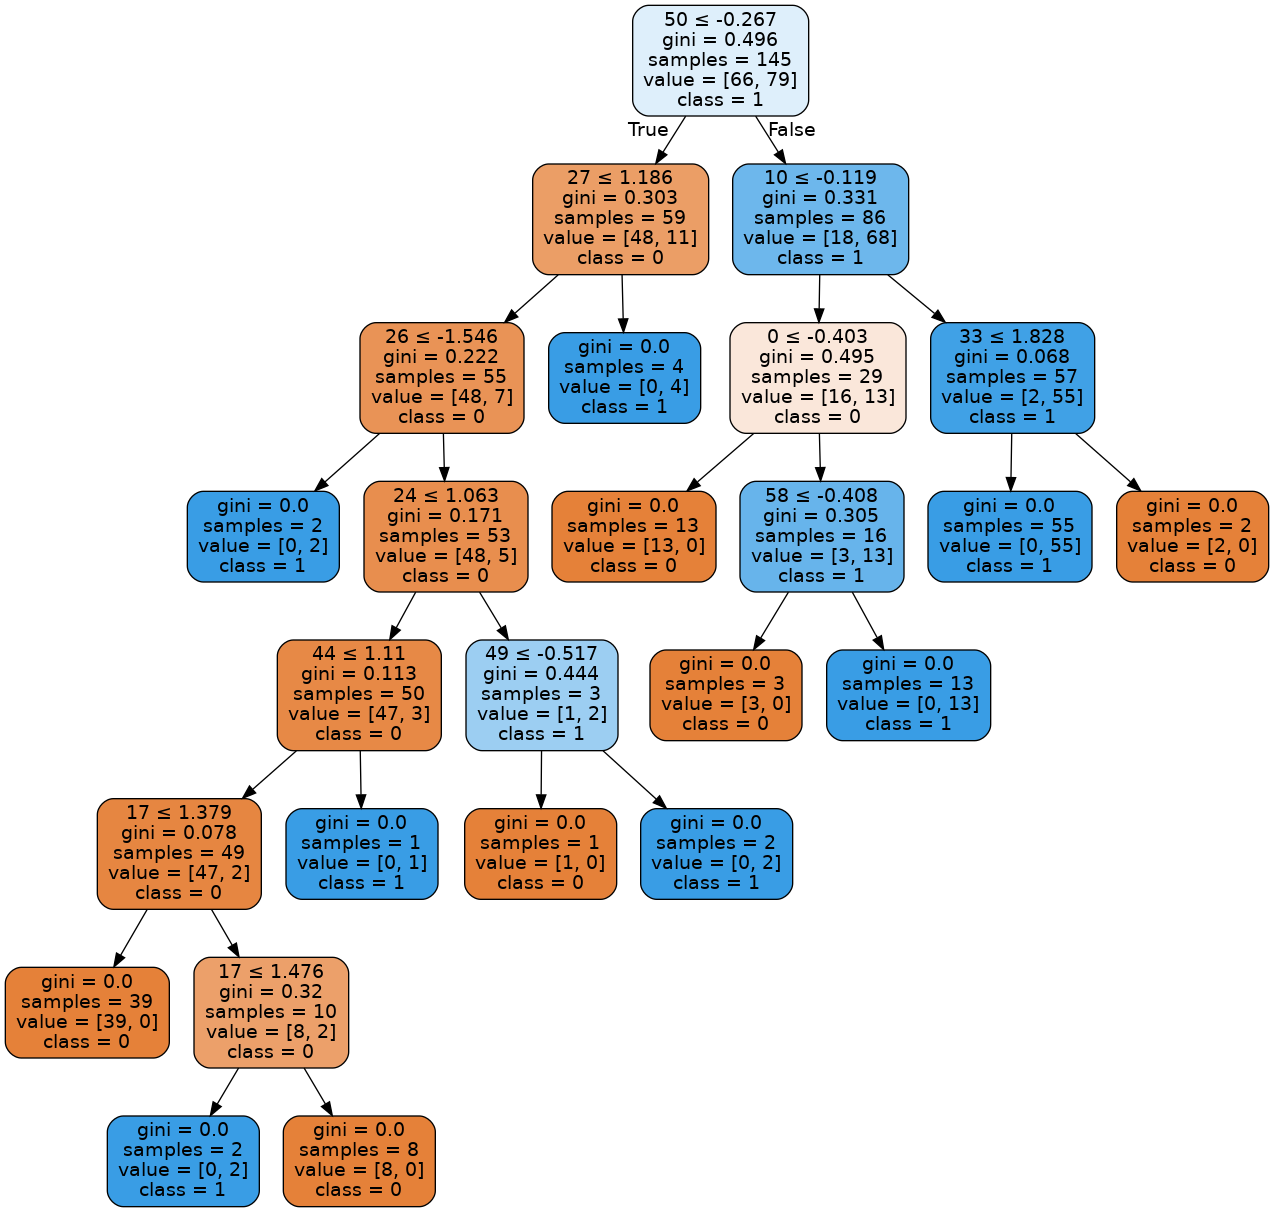

In [39]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = x.columns.values.tolist(),class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())